In [ ]:
%cd ../..

/


In [ ]:
import os
import numpy as np
np.random.seed(42)
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy

In [ ]:
os.makedirs("imgs/chapter_11", exist_ok=True)

In [ ]:
mesh_size = 1
font_size=14

# Loss Function

Let's consider a loss function with two parameters, x and y

$\mathcal{L}(a,b) = (a-8)^2 + (a-2)^2$

In [ ]:
def loss_function(a,b):
    return (a-8)**2 + (b-2)**2

## Plotting the function

In [ ]:
#In the first cell install kaleido
!pip install -U kaleido

#In the second cell import the necessary packages and libraries
import sys  # Import sys module for adding to path
import kaleido # explicit import
import os
import numpy as np
np.random.seed(42)
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy

a_min, a_max = -30, 30
b_min, b_max = -30, 30
arange = np.arange(a_min, a_max, mesh_size)
brange = np.arange(b_min, b_max, mesh_size)
aa, bb = np.meshgrid(arange, brange)
loss = loss_function(aa, bb)

fig = go.Figure(
    data=[go.Surface(x=arange, y=brange, z=loss, name="Loss", colorscale="dense")]
)
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-1.2, y=1.5, z=1.8)
)
fig.update_layout(
    autosize=False,
    width=900,
    height=900,
    title_text=r"$\LARGE{\text{Loss Surface for }\mathcal{L}(a,b) = (a-8)^2 + (b-2)^2}$",
    titlefont={"size": 20},
    title_x=0.5,
    scene_camera=camera,
    scene=dict(
        xaxis_title="a",
        yaxis_title="b",
        zaxis_title="Loss",
        yaxis=dict(
            titlefont=dict(size=font_size+5),
            tickfont=dict(size=font_size-2),
        ),
        xaxis=dict(
            titlefont=dict(size=font_size+5),
            tickfont=dict(size=font_size-2),
        ),
        zaxis=dict(
            titlefont=dict(size=font_size+5),
            tickfont=dict(size=font_size-2),
        ),
    ),
)
fig.write_image("imgs/chapter_11/loss_surface.png")
fig.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00


# Gradient Descent

Gradient of the Loss function is a vector of:    
$ \delta_a = 2 (a-8)$    
$ \delta_b = 2 (b-2)$    

In [ ]:
def gradient(a, b):
    return 2*(a-8), 2*(b-2)

## Optimizing

In [ ]:
# maximum number of iterations that can be done
maximum_iterations = 500
# current iteration
current_iteration = 0
# Learning Rate
learning_rate = 0.01
#Initial value of a, b
current_a_value = 28
current_b_value = 27

#Initializing list variables to store the optimization path
opt_path_a = [current_a_value]
opt_path_b = [current_b_value]
opt_path_loss = [loss_function(current_a_value, current_b_value)]

while current_iteration < maximum_iterations:
    previous_a_value = current_a_value
    previous_b_value = current_b_value
    # Calculating he gradients at current values
    gradient_a, gradient_b = gradient(previous_a_value, previous_b_value)
    # Adjusting the parameters using the gradients
    current_a_value = current_a_value - learning_rate * gradient_a * (previous_a_value)
    current_b_value = current_b_value - learning_rate * gradient_b * (previous_b_value)
    current_iteration = current_iteration + 1
    opt_path_a.append(current_a_value)
    opt_path_b.append(current_b_value)
    opt_path_loss.append(loss_function(current_a_value, current_b_value))

print("The optimal value is found at ", current_a_value, current_b_value)

The optimal value is found at  8.000000000000005 2.000000002230101


In [ ]:
fig = go.Figure(data=[
    go.Surface(x=arange, y=brange, z=loss, name='Loss', colorscale="dense"),
    go.Scatter3d(
    x=opt_path_a, y=opt_path_b, z=opt_path_loss,
        mode="lines+markers",
    marker=dict(
        size=4,
        color="grey",
    ),
    line=dict(
        color='red',
        width=5
    )
)
])
fig.update_layout(
    autosize=False,
    width=900,
    height=900,
    title_text="Gradient Descent",
    titlefont={"size": 25},
    title_x=0.5,
    scene_camera=camera,
    scene=dict(
        xaxis_title='a',
        yaxis_title='b',
        zaxis_title='Loss',
        yaxis=dict(
        titlefont=dict(size=font_size+5),
        tickfont=dict(size=font_size-2),
        ),
        xaxis=dict(
            titlefont=dict(size=font_size+5),
            tickfont=dict(size=font_size-2),
        ),
        zaxis=dict(
            titlefont=dict(size=font_size+5),
            tickfont=dict(size=font_size-2),
        ),
        annotations=[
        dict(
            x=opt_path_a[0],
            y=opt_path_b[0],
            z=opt_path_loss[0],
            text="Starting Point",
            textangle=0,
            ax=10,
            ay=-75,
            font=dict(
                color="black",
                size=font_size+4
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=opt_path_a[-1],
            y=opt_path_b[-1],
            z=opt_path_loss[-1],
            text="Optimal Point",
            textangle=0,
            ax=0,
            ay=-75,
            font=dict(
                color="black",
                size=font_size+4
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        ]
    ),

)
fig.write_image("imgs/chapter_11/gradient_descent.png")
fig.show()

In [ ]:
from PIL import Image

In [ ]:
margin = 50

loss_surface = Image.open("imgs/chapter_11/loss_surface.png")
w_1, h = loss_surface.size
loss_surface = loss_surface.crop((0,0,w_1-90,h))
w_1, h = loss_surface.size
g_des = Image.open("imgs/chapter_11/gradient_descent.png")
w_2, _ = g_des.size

new_im = Image.new('RGB', (w_1+w_2+2*margin,h+2*margin), (250,250,250))

new_im.paste(loss_surface, (margin,margin))
new_im.paste(g_des, (w_1,margin))

new_im.save("imgs/chapter_11/loss_surface_descent.png", format="png")

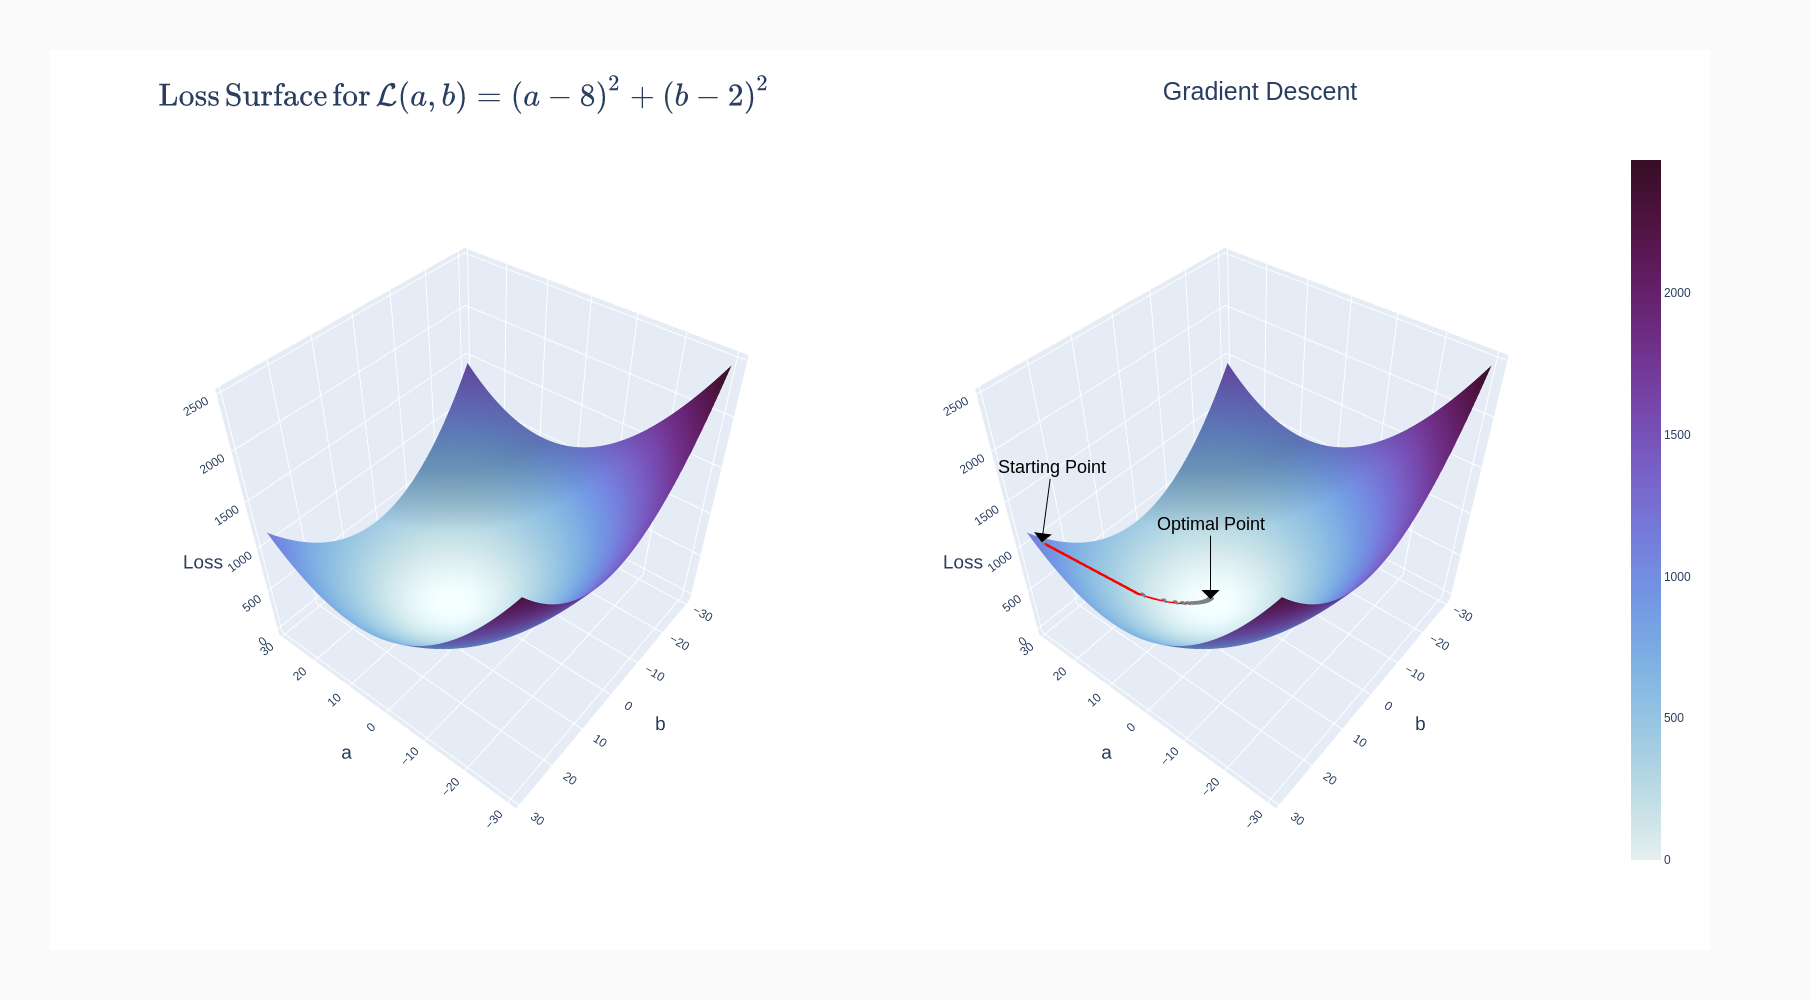

In [ ]:
from IPython.display import Image
Image("imgs/chapter_11/loss_surface_descent.png")